In [1]:
import pandas as pd
import seaborn as sns 
import sklearn as sk
import numpy as np
from matplotlib import pyplot as plt

## EX1)

In [2]:
basic1 = pd.read_csv('cluster data/basic1.csv')


### Gabarito 1

<Axes: xlabel='x', ylabel='y'>

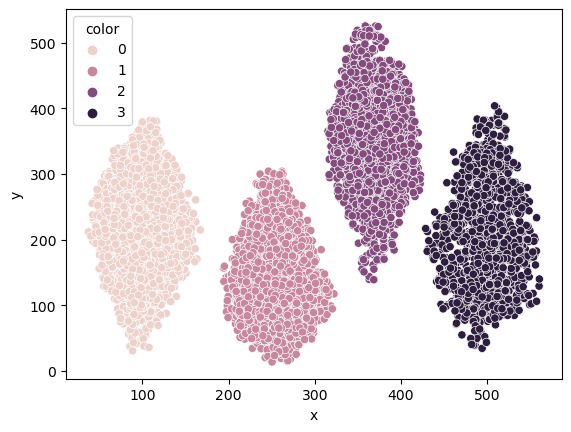

In [3]:
sns.scatterplot(data=basic1,x='x',y='y',hue='color')

Normalization

In [4]:

basic1_Kmeans = basic1.drop(columns='color')

In [5]:
from sklearn.preprocessing import Normalizer
basic1_data_norm = Normalizer().fit_transform(basic1_Kmeans.values)


### Kmeans test

In [6]:
from sklearn.cluster import  KMeans
kmeans = KMeans(n_clusters= 4)
y_pred = kmeans.fit_predict(basic1_data_norm)

C:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
basic1_Kmeans['pred'] = y_pred

<Axes: xlabel='x', ylabel='y'>

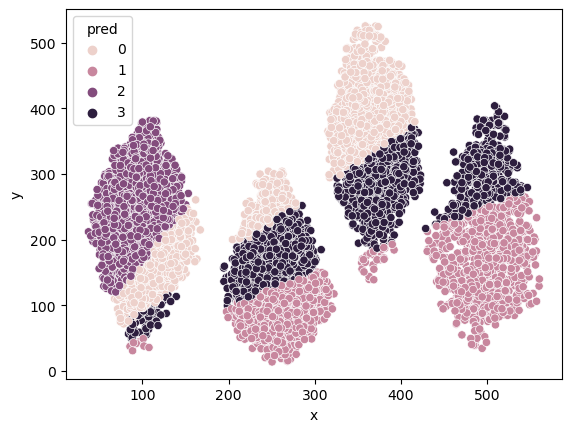

In [8]:
sns.scatterplot(data=basic1_Kmeans,x='x',y='y',hue='pred')

In [9]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(basic1_data_norm,kmeans.labels_,metric='euclidean')
print(silhouette)

0.5790469604524126


### DBSCAN

In [10]:
basic1_DBSCAN = basic1.drop(columns='color')

In [11]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=15)
nbrs = nn.fit(basic1_DBSCAN)
distances, indices = nbrs.kneighbors(basic1_DBSCAN)

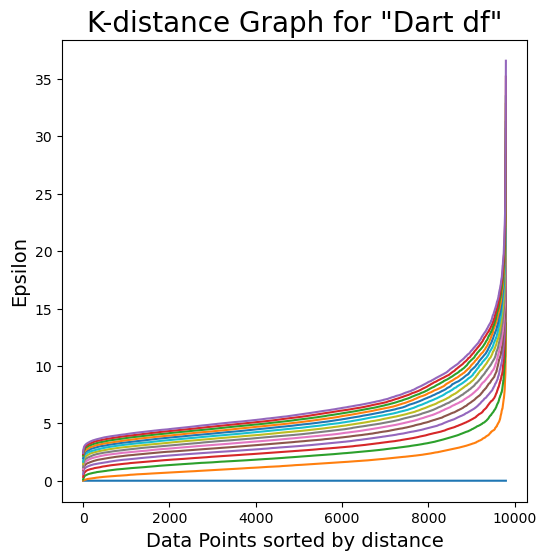

In [12]:


distances = np.sort(distances, axis=0)

#
plt.figure(figsize=(6,6))

plt.plot(distances)
plt.title('K-distance Graph for "Dart df"',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

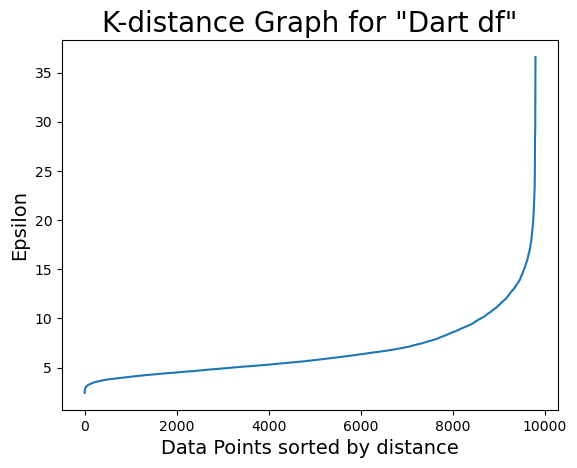

In [21]:

plt.plot(distances[:,14])
plt.title('K-distance Graph for "Dart df"',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [14]:
print(distances)

[[0.00000000e+00 6.09069391e-03 1.19258656e-01 ... 2.20596133e+00
  2.32973374e+00 2.41486257e+00]
 [0.00000000e+00 6.09069391e-03 1.66884928e-01 ... 2.26646602e+00
  2.40842098e+00 2.48562295e+00]
 [0.00000000e+00 2.54823496e-02 1.66884928e-01 ... 2.27530620e+00
  2.45447039e+00 2.54557574e+00]
 ...
 [0.00000000e+00 1.25006907e+01 1.51412749e+01 ... 3.11439999e+01
  3.44561861e+01 3.51789350e+01]
 [0.00000000e+00 1.30010459e+01 1.61772715e+01 ... 3.23093968e+01
  3.51398188e+01 3.52139996e+01]
 [0.00000000e+00 1.37049040e+01 1.65313360e+01 ... 3.34890485e+01
  3.52036073e+01 3.65915392e+01]]


In [15]:
dbscan = sk.cluster.DBSCAN(eps=25,min_samples=4)
y_predDBS = dbscan.fit_predict(basic1_DBSCAN)
basic1_DBSCAN['pred'] = y_predDBS

<Axes: xlabel='x', ylabel='y'>

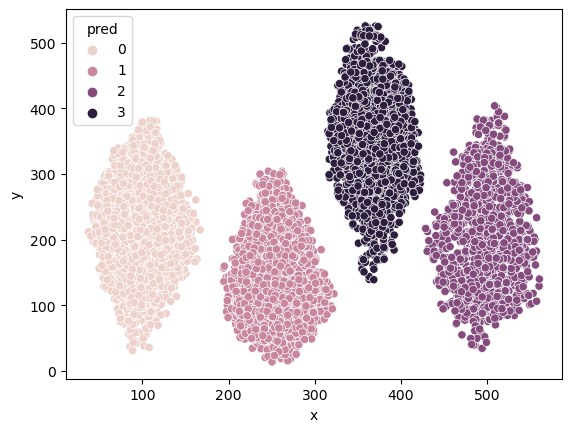

In [16]:
sns.scatterplot(data=basic1_DBSCAN,x='x',y='y',hue='pred')